In [65]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import random

In [2]:
df=pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

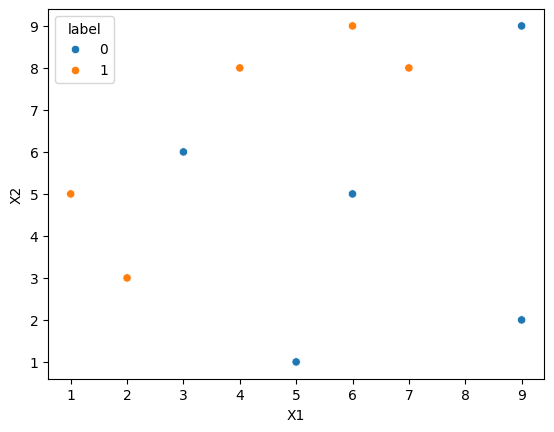

In [6]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [7]:
df['weights']=1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
df1=DecisionTreeClassifier(max_depth=1)

In [30]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [31]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [32]:
df1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [33]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

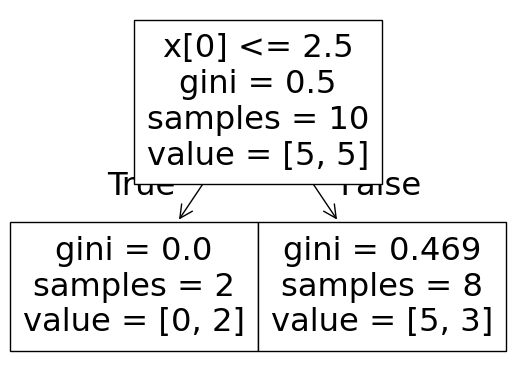

In [34]:
plot_tree(df1)

<Axes: >

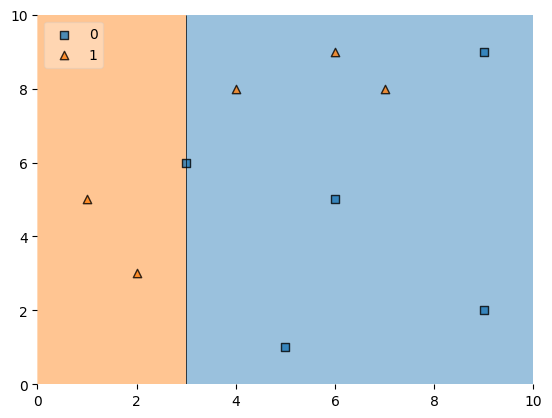

In [35]:
plot_decision_regions(X,y,clf=df1,legend=2)

In [36]:
df['y_pred']=df1.predict(X)

In [37]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [38]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [40]:
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [45]:
#update weight
def update_weight(row,alpha=0.42364):
    if(row['label']==row['y_pred']):
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
    

In [46]:
df['updated_weights']=df.apply(update_weight,axis=1)

In [47]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065466
1,2,3,1,0.1,1,0.065466
2,3,6,0,0.1,0,0.065466
3,4,8,1,0.1,0,0.152751
4,5,1,0,0.1,0,0.065466
5,6,9,1,0.1,0,0.152751
6,6,5,0,0.1,0,0.065466
7,7,8,1,0.1,0,0.152751
8,9,9,0,0.1,0,0.065466
9,9,2,0,0.1,0,0.065466


In [49]:
df['updated_weights'].sum()
#it is not 1.0 we need to make it so will divide every row by 0.9165

0.9165151390277133

In [50]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [51]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065466,0.071429
1,2,3,1,0.1,1,0.065466,0.071429
2,3,6,0,0.1,0,0.065466,0.071429
3,4,8,1,0.1,0,0.152751,0.166665
4,5,1,0,0.1,0,0.065466,0.071429
5,6,9,1,0.1,0,0.152751,0.166665
6,6,5,0,0.1,0,0.065466,0.071429
7,7,8,1,0.1,0,0.152751,0.166665
8,9,9,0,0.1,0,0.065466,0.071429
9,9,2,0,0.1,0,0.065466,0.071429


In [52]:
df['normalized_weights'].sum()

1.0

In [53]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [55]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [56]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065466,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065466,0.071429,0.142858,0.071429
2,3,6,0,0.1,0,0.065466,0.071429,0.214288,0.142858
3,4,8,1,0.1,0,0.152751,0.166665,0.380953,0.214288
4,5,1,0,0.1,0,0.065466,0.071429,0.452382,0.380953
5,6,9,1,0.1,0,0.152751,0.166665,0.619047,0.452382
6,6,5,0,0.1,0,0.065466,0.071429,0.690476,0.619047
7,7,8,1,0.1,0,0.152751,0.166665,0.857142,0.690476
8,9,9,0,0.1,0,0.065466,0.071429,0.928571,0.857142
9,9,2,0,0.1,0,0.065466,0.071429,1.000000,0.928571


In [59]:
df=df[['X1'	,'X2'	,'label'	,'weights'	,'y_pred'	,'updated_weights','normalized_weights','cumsum_lower','cumsum_upper']]

In [60]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065466,0.071429,0.000000,0.071429
1,2,3,1,0.1,1,0.065466,0.071429,0.071429,0.142858
2,3,6,0,0.1,0,0.065466,0.071429,0.142858,0.214288
3,4,8,1,0.1,0,0.152751,0.166665,0.214288,0.380953
4,5,1,0,0.1,0,0.065466,0.071429,0.380953,0.452382
5,6,9,1,0.1,0,0.152751,0.166665,0.452382,0.619047
6,6,5,0,0.1,0,0.065466,0.071429,0.619047,0.690476
7,7,8,1,0.1,0,0.152751,0.166665,0.690476,0.857142
8,9,9,0,0.1,0,0.065466,0.071429,0.857142,0.928571
9,9,2,0,0.1,0,0.065466,0.071429,0.928571,1.000000


In [77]:
def create_new_dataset(df):
    indicies=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_lower']<a and row['cumsum_upper']>a:
                indicies.append(index)
    return indicies

In [78]:
index_values=create_new_dataset(df)

In [79]:
index_values

[7, 4, 8, 2, 4, 7, 7, 1, 8, 7]

In [81]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [82]:
second_df

,X1,X2,label,weights
7,7,8,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1


In [83]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [84]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [85]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.625, 0.5, '  False')]

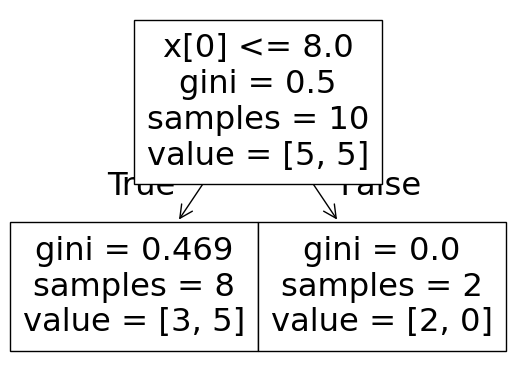

In [86]:
plot_tree(dt2)

<Axes: >

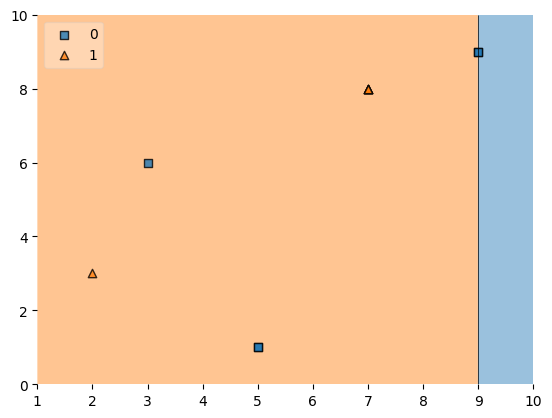

In [87]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [88]:
second_df['y_pred'] = dt2.predict(X)
     

In [89]:
second_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
4,5,1,0,0.1,1
8,9,9,0,0.1,0
2,3,6,0,0.1,1
4,5,1,0,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
7,7,8,1,0.1,1


In [91]:
alpha2=calculate_model_weight(0.3)

In [93]:
alpha2

0.42364893019360184

In [94]:
def update_weights(row,alpha=0.42364):
    if(row['label']==row['y_pred']):
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [95]:
second_df['updated_weights']=second_df.apply(update_weights,axis=1)

In [96]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
7,7,8,1,0.1,1,0.065466
4,5,1,0,0.1,1,0.152751
8,9,9,0,0.1,0,0.065466
2,3,6,0,0.1,1,0.152751
4,5,1,0,0.1,1,0.152751
7,7,8,1,0.1,1,0.065466
7,7,8,1,0.1,1,0.065466
1,2,3,1,0.1,1,0.065466
8,9,9,0,0.1,0,0.065466
7,7,8,1,0.1,1,0.065466


In [97]:
second_df['updated_weights'].sum()

0.9165151390277133

In [98]:
second_df['normalized_weights']=second_df['updated_weights']/second_df['updated_weights'].sum()

In [99]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
7,7,8,1,0.1,1,0.065466,0.071429
4,5,1,0,0.1,1,0.152751,0.166665
8,9,9,0,0.1,0,0.065466,0.071429
2,3,6,0,0.1,1,0.152751,0.166665
4,5,1,0,0.1,1,0.152751,0.166665
7,7,8,1,0.1,1,0.065466,0.071429
7,7,8,1,0.1,1,0.065466,0.071429
1,2,3,1,0.1,1,0.065466,0.071429
8,9,9,0,0.1,0,0.065466,0.071429
7,7,8,1,0.1,1,0.065466,0.071429


In [100]:
second_df['normalized_weights'].sum()

1.0

In [102]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [103]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [104]:

second_df=second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

In [105]:
second_df

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
7,7,8,1,0.1,1,0.071429,0.000000,0.071429
4,5,1,0,0.1,1,0.166665,0.071429,0.238094
8,9,9,0,0.1,0,0.071429,0.238094,0.309524
2,3,6,0,0.1,1,0.166665,0.309524,0.476189
4,5,1,0,0.1,1,0.166665,0.476189,0.642854
7,7,8,1,0.1,1,0.071429,0.642854,0.714283
7,7,8,1,0.1,1,0.071429,0.714283,0.785712
1,2,3,1,0.1,1,0.071429,0.785712,0.857142
8,9,9,0,0.1,0,0.071429,0.857142,0.928571
7,7,8,1,0.1,1,0.071429,0.928571,1.000000


In [106]:
index_values = create_new_dataset(second_df)

In [107]:

third_df = second_df.iloc[index_values,[0,1,2,3]]

In [108]:

third_df

,X1,X2,label,weights
8,9,9,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1
8,9,9,0,0.1
1,2,3,1,0.1
4,5,1,0,0.1


In [109]:

dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

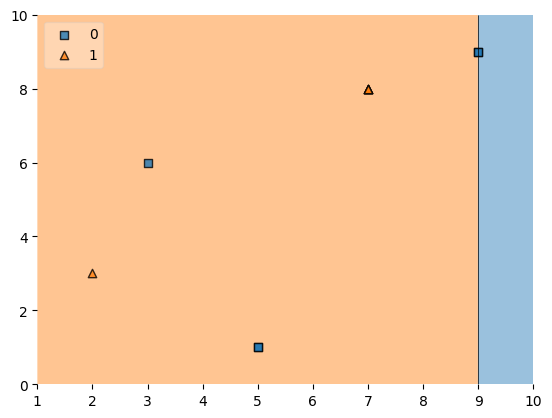

In [110]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [111]:
third_df['y_pred'] = dt3.predict(X)

In [112]:

third_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
4,5,1,0,0.1,1
1,2,3,1,0.1,0
4,5,1,0,0.1,1
4,5,1,0,0.1,1
1,2,3,1,0.1,1
4,5,1,0,0.1,1
8,9,9,0,0.1,1
1,2,3,1,0.1,0
4,5,1,0,0.1,1


In [113]:

alpha3 = calculate_model_weight(0.9)
alpha3

-1.0986122886681098

In [114]:

print(alpha1,alpha2,alpha3)

0.42364893019360184 0.42364893019360184 -1.0986122886681098


In [116]:

query = np.array([1,5]).reshape(1,2)
df1.predict(query)

array([1], dtype=int64)

In [117]:

dt2.predict(query)

array([1], dtype=int64)

In [118]:
dt3.predict(query)

array([1], dtype=int64)

In [119]:

alpha1*1 + alpha2*(1) + alpha3*(1)

-0.2513144282809061

In [121]:
np.sign(-0.2513144282809061)

-1.0

In [123]:

query = np.array([9,9]).reshape(1,2)
df1.predict(query)

array([0], dtype=int64)

In [124]:
dt2.predict(query)

array([0], dtype=int64)

In [125]:

dt3.predict(query)

array([0], dtype=int64)

In [126]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

1.0986122886681098

In [127]:

np.sign(1.0986122886681098
)

1.0